In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm
from scipy.stats import norm

# Exercise 7.1

In [2]:
m0 = 0 # Mean p(x)
s0 = 1 # Var(x)
s = 1 # Var(t|x)
y0 = 1 # Measurement

In [3]:
# x
px_m = 1/np.sqrt(np.pi)
px_s = 1-1/np.pi

# t
pt_m = 2/np.sqrt(np.pi)
pt_s = 2*(1-2/np.pi)

In [4]:
# Importance sampler
L = 100000 # number of samples
x = np.random.normal(size=L)*np.sqrt(s0)+m0 #draw from p(x)
t = np.random.normal(size=L)*np.sqrt(s)+x #draw from p(t|x)
y = np.sign(t)
w = (y==y0)

w = L*w/np.sum(w)

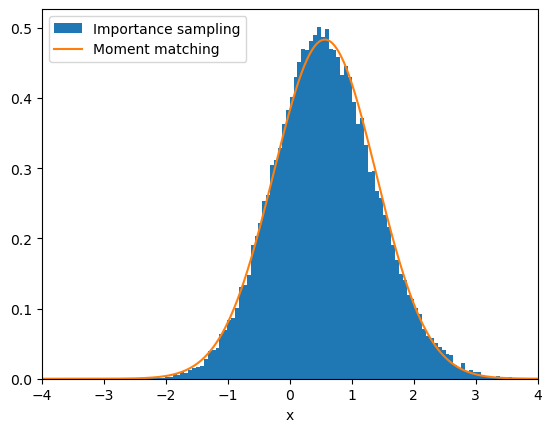

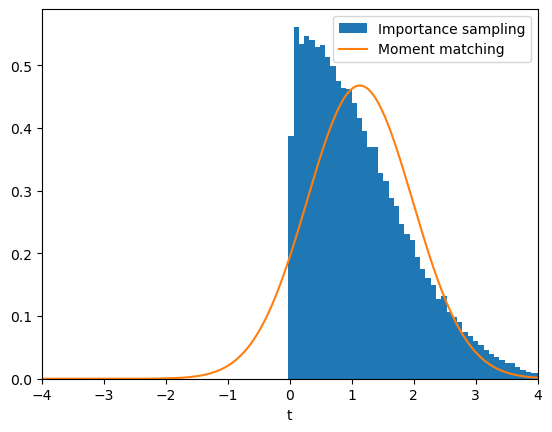

Mean moment - matching : 0.5641895835477563
Mean importance sampling : 0.5695298300215429
Variance moment - matching  0.6816901138162093
Variance importance sampling  0.6817349299991815


In [5]:
# plot a weighted histogram of x
plt.hist(x, weights = w, bins = 150, density = True, label = "Importance sampling")
xv = np.linspace(-4, 4, 1000)
plt.plot(xv, norm.pdf(xv , px_m ,np.sqrt(px_s)), label = "Moment matching")
plt.xlim((-4 ,4))
plt.xlabel("x")
plt.legend()
plt.show()

# plot a weighted histogram of t
plt.hist(t, weights = w, bins = 150, density = True, label = "Importance sampling")
xv = np.linspace(-4, 4, 1000)
plt.plot(xv, norm.pdf(xv, pt_m, np.sqrt(pt_s)), label = "Moment matching")
plt.xlim((-4, 4))
plt.xlabel("t")
plt.legend()
plt.show()

est_mean = np.sum(x*w)/L
est_var = np.sum(w*( est_mean -x)**2)/L

print("Mean moment - matching :", px_m)
print("Mean importance sampling :", est_mean)

print("Variance moment - matching ", px_s)
print("Variance importance sampling ", est_var)

# Exercise 7.2

In [6]:
def multGauss(m1,s1,m2,s2):
    s = 1/(1/s1+1/s2)
    m = s*(m1/s1+m2/s2)
    return m, s

def divGauss(m1,s1,m2,s2):
    return multGauss(m1,s1,m2,-s2)

def truncGauss(a,b,m0,s0):
    a_scaled, b_scaled = (a-m0)/np.sqrt(s0), (b-m0)/np.sqrt(s0)
    m = truncnorm.mean(a_scaled, b_scaled, loc=m0, scale=np.sqrt(s0))
    s = truncnorm.var(a_scaled, b_scaled, loc=m0, scale=np.sqrt(s0))
    return m, s

m0 = 0
s0 = 1
sv = 1
y0 = 1

mu3_m = m0
mu3_s = s0

mu4_m = mu3_m
mu4_s = mu3_s

mu5_m = mu4_m
mu5_s = mu4_s + sv

if y0 == 1:
    a, b = 0, np.inf
else:
    a, b = np.NINF, 0

pt_m, pt_s = truncGauss(a, b, mu5_m, mu5_s)

mu6_m, mu6_s = divGauss(pt_m, pt_s, mu5_m, mu5_s)

mu7_m = mu6_m
mu7_s = mu6_s + sv

px_m, px_s = multGauss(mu3_m, mu3_s, mu7_m, mu7_s)

print(px_m)
print(px_s)

0.5641895835477563
0.6816901138162093


In [7]:
ax, bx = -1, 1

mu4_m = 0
mu4_s = 1

for j in range(0, 10):
    mu5_m = mu4_m
    mu5_s = mu4_s + sv
    
    if y0 == 1:
        a, b = 0, np.inf
    else:
        a, b = np.NINF, 0
    
    pt_m, pt_s = truncGauss(a, b, mu5_m, mu5_s)

    mu6_m, mu6_s = divGauss(pt_m, pt_s, mu5_m, mu5_s)

    mu7_m = mu6_m
    mu7_s = mu6_s + sv

    px_m, px_s = truncGauss(ax, bx, mu7_m, mu7_s)
    
    mu4_m, mu4_s = divGauss(px_m, px_s, mu7_m, mu7_s)
    
print(px_m)
print(px_s)

0.2441555408416154
0.2760332340143942
